# Wave-Particle Duality of Light

This notebook is used with Lab 2 to perform fits and measure Planck's constant.


**First things first, make sure you save this notebook to your drive so you can save your changes!!!**

<div>
<img src="save_to_drive.png" width="250"/>
</div>

In [52]:
'''
This code is used to set up the fitting library.  Run this block without modification.
'''

%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
import inspect

'''
Arguments:
  - func:   the callable function used to fit the data.  
            First argument must be the indpendent variable, rest of arguments are free parameters
  - xdata:  list of x axis coordinates of the data
  - ydata:  list of y axis coordinates of the data
  - xlabel: the title to put on the x axis
  - ylabel: the title to put on the y axis
  
Returns:
  - optimizedParameters: a list of the best fit values of the function parameters
'''
def fit(func, xdata, ydata, xlabel='', ylabel=''):
    plt.plot(xdata, ydata, ".", label="Data")
    # a little hack for this lab only: finding the best fit parameters is hard so here is a 
    # reasonable choice.  Later we will do a more complete investigation of curve fitting
    p0=[0.5, 1000, -200, 2]
    if len(inspect.getfullargspec(func).args[1:]) < len(p0):
        optimizedParameters, pcov = opt.curve_fit(func, np.asarray(xdata), np.asarray(ydata))
    else:
        optimizedParameters, pcov = opt.curve_fit(func, np.asarray(xdata), np.asarray(ydata), p0=p0)
    
    xinterp   = np.linspace(min(xdata), max(xdata), 100)
    fitinterp = [func(x, *optimizedParameters) for x in xinterp]
    plt.plot(xinterp, fitinterp, label="fit")
    plt.legend()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    print('The best fit parameters are: ', [p for p in optimizedParameters])
    return optimizedParameters

## Experiment 1: Measuring stopping voltages

For each laser pointer, tune the applied voltage to match each of the values listed here.  At each voltage value record the photocurrent.

The applied voltage is the "independent variable" in this experiment and it is the voltage shown on the left hand side of the experimental setup.

The "dependent variable" is the photocurrent.  Instead of measuring the current directly, we measure the voltage drop across a 10,000 $\Omega$ resistor.  Then, using Ohm's law $V=IR$ (Voltage = Current times Resistance) the photocurrent (rate of electrons reaching the anode) is determined.  You can multiply the values shown in mV on the right hand side of the experiment by 10,000 to find the current (or don't, since the factor of 10,000 is an arbitrary scale factor and will not change your value of Planck's constant).

In [46]:
Vr_red = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.60, 0.80, 1.00]
i_meas_red = [6.8, 5.7, 4.0, 2.25, 1.05, .4, .129, 0.022, -0.02, -0.04, -0.05, -0.06, -0.06] # You need to fill this out!!

Vr_green = [0.05, 0.10, 0.15, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.00, 1.10, 1.20, 1.40]
i_meas_green = [42.5, 39.6, 36.3, 32.4, 23.2, 14.0, 5.29, 1.34, 0.166, -0.28, -0.48, -0.62, -0.66, -0.69, -0.722] # You need to fill this out!!

Vr_violet = [0.20, 0.40, 0.60, 0.80, 1.00, 1.20, 1.40, 1.60, 1.80, 2.00, 2.20, 2.40]
i_meas_violet = [45.3, 35.4, 23.7, 12.6, 4.36, 0.68, -0.4, -0.8, -1.125, -1.217, -1.26, -1.38] # You need to fill this out!!

# this code block checks for you that there are the same 
# number of voltage and current values for each laser pointer
if len(Vr_red) != len(i_meas_red):
    print('Warning!! There are %d voltage values and %d current values for the red laser pointer' % (len(Vr_red), len(i_meas_red)))
if len(Vr_green) != len(i_meas_green):
    print('Warning!! There are %d voltage values and %d current values for the green laser pointer' % (len(Vr_red), len(i_meas_red)))
if len(Vr_violet) != len(i_meas_violet):
    print('Warning!! There are %d voltage values and %d current values for the violet laser pointer' % (len(Vr_red), len(i_meas_red)))

In [47]:
# define the fit function for the current vs. voltage curve
# Run this code block without modification

def step(x):
    return x>=0

def i_func(v, vs, a, b, c):
    return (a*np.power(vs-v, 3)*step(vs-v)+b*np.power(vs-v, 4)*step(vs-v))/(1+c*np.power(vs-v, 2)*step(vs-v))

## Experiment 2: Determine the stopping voltage

Next, perform the three fits to the measured data.  Note that the function "fit" returns the optimized parameter values so you can store them for use later.

Make sure you are careful to include axis labels and units on the variables in your axis labels like "Distance (meters)".  The function `fit` accepts arguments for the axis labels.

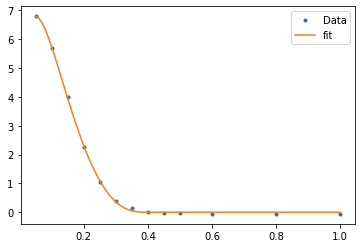

The best fit parameters are:  [0.3991714315358934, 461.0503716529019, -1110.710205875848, -4.441011214530992]


In [48]:
# perform the fit for the red laser pointer

fit_red = fit(i_func, Vr_red, i_meas_red, xlabel='', ylabel='')

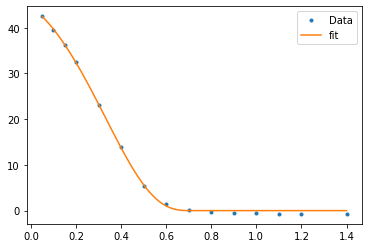

The best fit parameters are:  [0.7105498995548213, 865.7893015405866, -609.4106982629829, 4.914882238339573]


In [49]:
# perform the fit for the green laser pointer

fit_green = fit(i_func, Vr_green, i_meas_green, xlabel='', ylabel='')

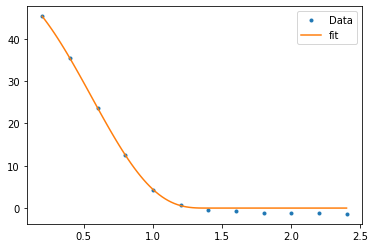

The best fit parameters are:  [1.3869993022751108, 99.42787822246719, -41.92928686353522, 0.591504227595027]


In [50]:
# perform the fit for the violet laser pointer

fit_violet = fit(i_func, Vr_violet, i_meas_violet, xlabel='', ylabel='')

## Experiment 3: Measure Planck's constant

From the 3 values of stopping potential we can fit Planck's constant from the data.  The functional form is 

$$E_{\textrm{max}}=hf-e\phi$$

Define a new function which accepts 3 arguments: x, m, and b.  It should return a linear function with slope m and intercept b.  Then, pass this function to the function `fit` and determine Planck's constant.

Notes: 
1. You will need to convert the stopping voltage from the fits to an energy using the electron charge $E_{\textrm{max}}=eV_s$ where $e=1.6\times10^{-19}$ Coulombs.
2. The function `fit` returns a `numpy` array of the best fit parameters.  $V_s$ is the first parameter in the array.
3. You will need to convert the wavelength of each laser to its frequency to plot $E_{\textrm{max}}$ as a function of frequency.  You can use the relation $v=\lambda f$ where $v$ in this case is the speed of light, $3\times10^8$ m/s.  The wavelengths of the three lasers are: red=635nm, green=532nm, violet=405nm.

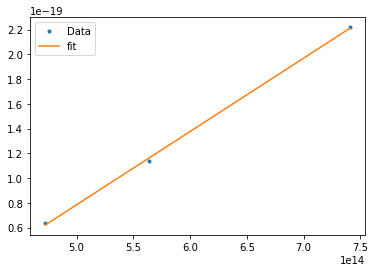

The best fit parameters are:  [5.921959862426536e-34, -2.1763704283144643e-19]


array([ 5.92195986e-34, -2.17637043e-19])

In [53]:
def linear(x, m, b):
    return m*x+b

def frequency(wavelength):
    return 3.0e8/wavelength

x_freq = frequency(np.array([635e-9, 532e-9, 405e-9]))
y_emax = 1.6e-19*np.array([fit_red[0], fit_green[0], fit_violet[0]])

fit(linear, x_freq, y_emax)

## Experiment 4: Intensity dependence of $V_s$

Repeat the measurement of all photocurrents (using each of the 3 lasers) and determine $V_s$ using the `fit` function.  Does the value of $V_s$ depend on the light intensity?  Therefore, does the energy in the light waves depend on light intensity?